In [1]:
# 读取数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
train_data=pd.read_csv(r"Dataset/cs-training.csv",index_col="Unnamed: 0")
test_data=pd.read_csv(r"Dataset/cs-test.csv",index_col="Unnamed: 0")
column_names=["Default","Balance_r","Age","Worse_1m", "Debt_r","Income","Credit_num","Worse_3m","Estate_num","Worse_2m","Family_num"]
train_data.columns=column_names
test_data.columns=column_names
skew =train_data.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_index=skew_df[skew_df>10].dropna().index
log_data=np.log(train_data[skew_index]+1)
train_data1=train_data.copy()
train_data1[skew_index]=log_data
for name in column_names:
    train_data1[name]=winsorize(train_data1[name], limits=[0.005,0.005],nan_policy="omit")

In [2]:
#图片显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码

# 散点图
从散点图观察各个因素之间的大致关系

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:96: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


array([[<AxesSubplot:xlabel='Default', ylabel='Default'>,
        <AxesSubplot:xlabel='Balance_r', ylabel='Default'>,
        <AxesSubplot:xlabel='Age', ylabel='Default'>,
        <AxesSubplot:xlabel='Worse_1m', ylabel='Default'>,
        <AxesSubplot:xlabel='Debt_r', ylabel='Default'>,
        <AxesSubplot:xlabel='Income', ylabel='Default'>,
        <AxesSubplot:xlabel='Credit_num', ylabel='Default'>,
        <AxesSubplot:xlabel='Worse_3m', ylabel='Default'>,
        <AxesSubplot:xlabel='Estate_num', ylabel='Default'>,
        <AxesSubplot:xlabel='Worse_2m', ylabel='Default'>,
        <AxesSubplot:xlabel='Family_num', ylabel='Default'>],
       [<AxesSubplot:xlabel='Default', ylabel='Balance_r'>,
        <AxesSubplot:xlabel='Balance_r', ylabel='Balance_r'>,
        <AxesSubplot:xlabel='Age', ylabel='Balance_r'>,
        <AxesSubplot:xlabel='Worse_1m', ylabel='Balance_r'>,
        <AxesSubplot:xlabel='Debt_r', ylabel='Balance_r'>,
        <AxesSubplot:xlabel='Income', ylabel='Balance_r

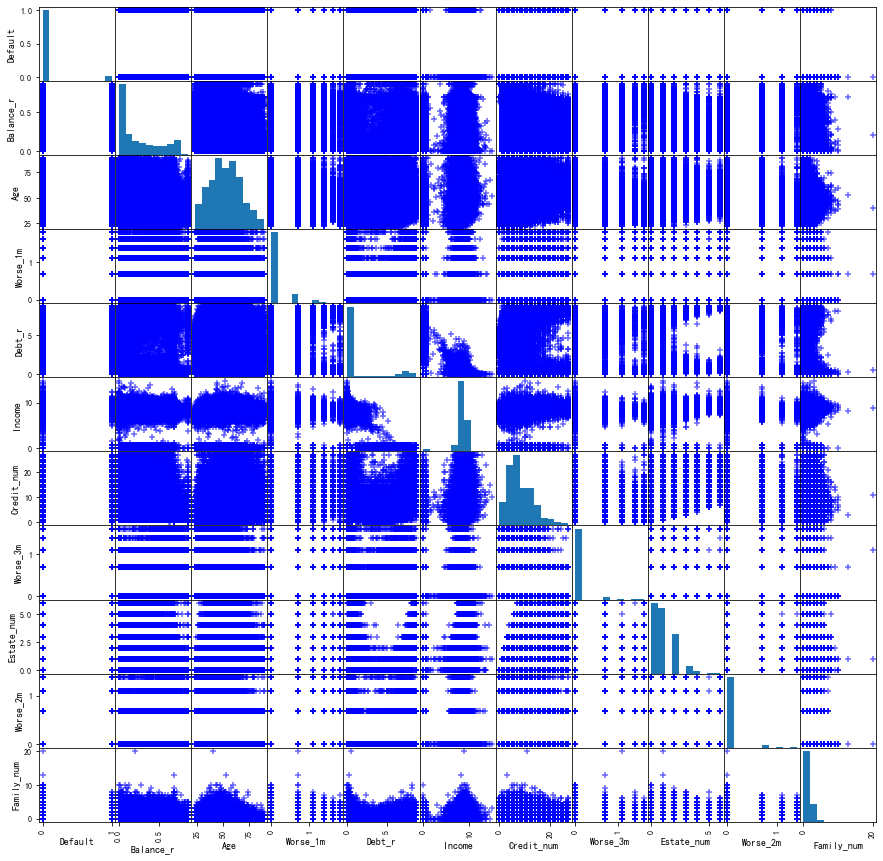

In [3]:
pd.plotting.scatter_matrix(train_data1,figsize=(15,15),c = 'b',marker = '+',diagonal='hist',alpha = 0.6,range_padding=0.1)

# 相关系数表

In [4]:
train_data1_corr=train_data1.corr()
print(train_data1_corr)

             Default  Balance_r       Age  Worse_1m    Debt_r    Income  \
Default     1.000000   0.275301 -0.115611  0.283622 -0.017305 -0.017929   
Balance_r   0.275301   1.000000 -0.284807  0.265426 -0.045159 -0.043770   
Age        -0.115611  -0.284807  1.000000 -0.092890  0.077130  0.093336   
Worse_1m    0.283622   0.265426 -0.092890  1.000000 -0.022896  0.008538   
Debt_r     -0.017305  -0.045159  0.077130 -0.022896  1.000000 -0.785474   
Income     -0.017929  -0.043770  0.093336  0.008538 -0.785474  1.000000   
Credit_num -0.030871  -0.142610  0.149944  0.062396 -0.004771  0.187368   
Worse_3m    0.354125   0.280855 -0.106342  0.297799 -0.015576 -0.035463   
Estate_num -0.013224  -0.061518  0.035251  0.029399  0.078103  0.225447   
Worse_2m    0.288363   0.221671 -0.088096  0.344468 -0.012345 -0.019294   
Family_num  0.046048   0.094659 -0.213627  0.065849 -0.134787  0.107171   

            Credit_num  Worse_3m  Estate_num  Worse_2m  Family_num  
Default      -0.030871  0.3541

# 热量图
画出热量图便于观察变量间的相关关系

In [5]:
np.ones_like(train_data1_corr,dtype=np.bool_)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  Tr

In [6]:
mask=np.triu(np.ones_like(train_data1_corr,dtype=np.bool_))

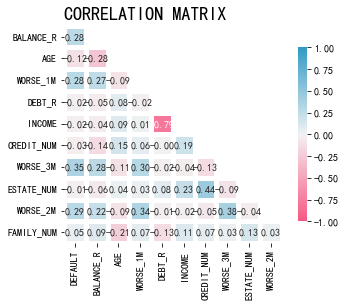

In [7]:
mask=mask[1:,:-1]
corr=train_data1_corr.iloc[1:,:-1].copy()
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
               linewidths=5, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8}, square=True)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
plt.show()

# Pair plot
其中下半部分包含回归图，以更好的观察相关关系。

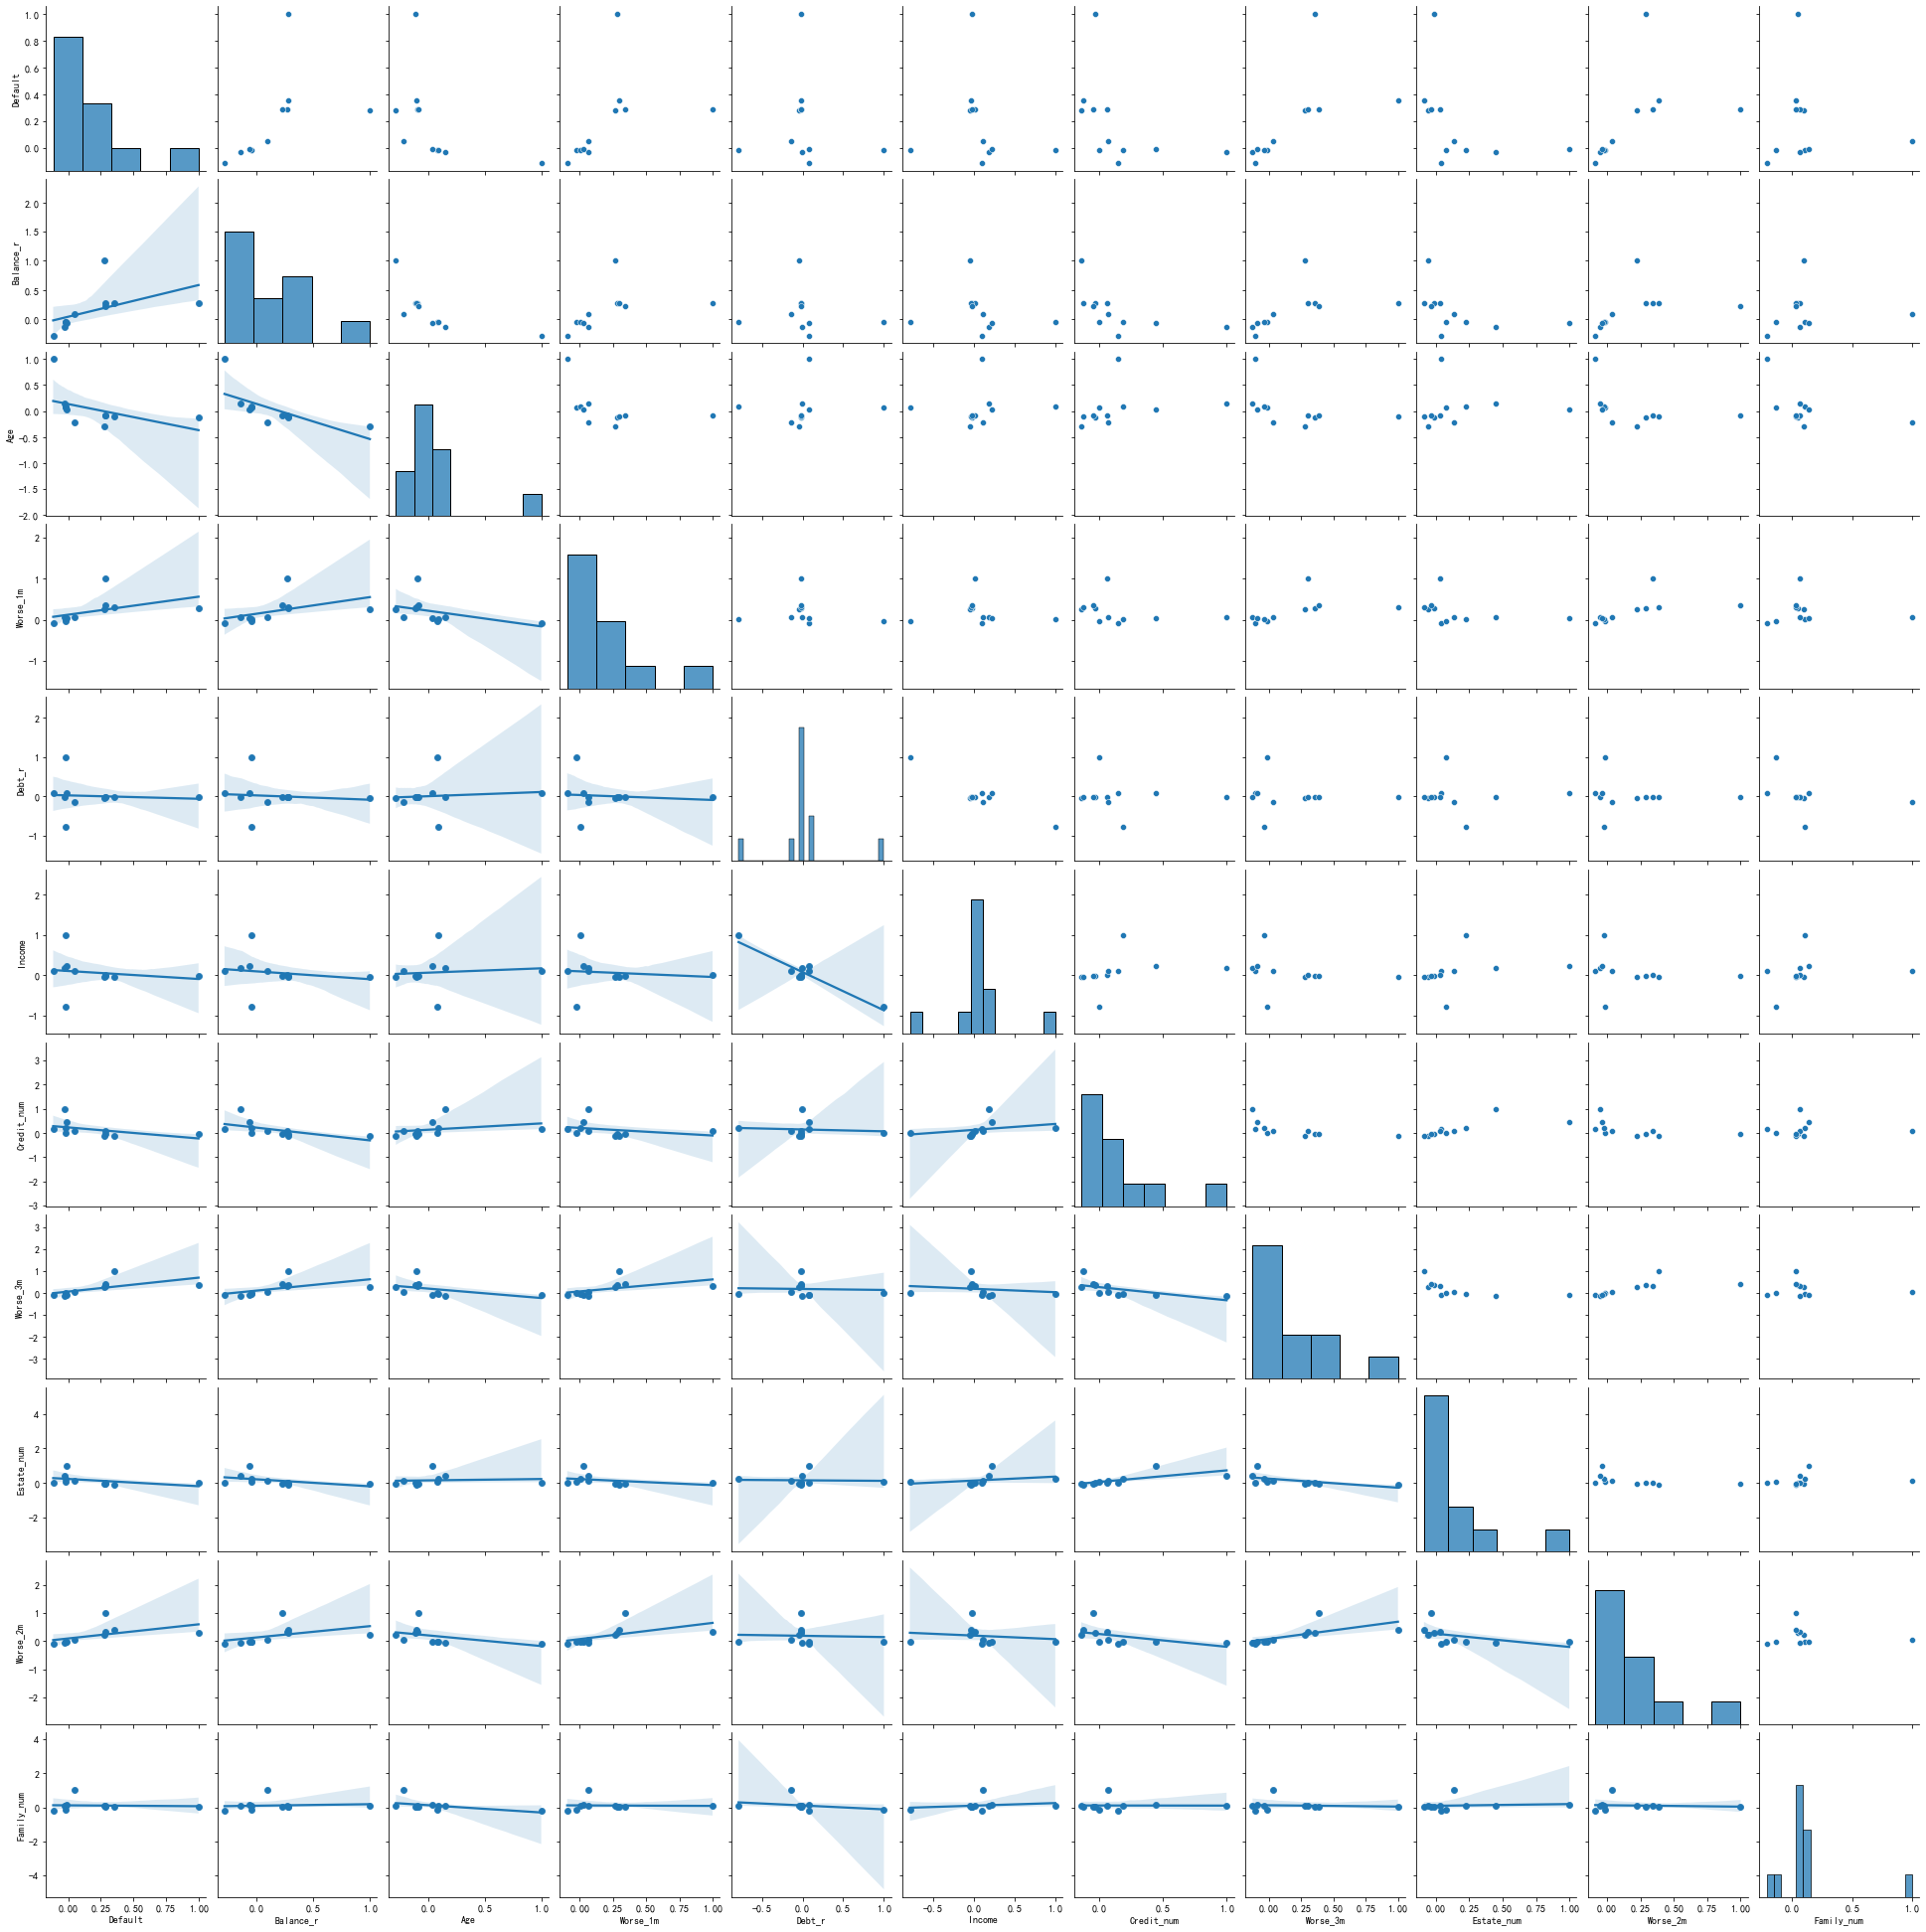

In [9]:
g = sns.pairplot(train_data1_corr) 
g.map_lower(sns.regplot)